# Import

In [1]:
import data_analysis as da
import numpy as np
import matplotlib.pyplot as plt

# PSTH Graphics Viewer

Select the approriate .csv file that has the uniform Ethier lab format

In [2]:
# PATH = "C:/Users/Vincent/Documents/GitHub/EthierLab/test.csv"
# PATH = "C:/Users/Vincent/Documents/GitHub/EthierLab/test.csv"
PATH =  "/Users/freddydagenais/Desktop/Maitrise/code/230/opto_peripherique /230_stim_opto_periph_droit_csv/230_stim_opto_periph_droit_33.csv"
PATH_saving = "/Users/freddydagenais/Desktop/Maitrise/code/opto_peripherique /230_stim_opto_periph_droit_csv/psth/"

# Modifiable Values

In [3]:
events = "Stim" # Enter the channel name for the Events
Signal_psth = "EMG flex."  # Enter the channel name for the PSTH
experiment = 0 # Put 1 for single spike signal, 2 for knob exepriement, 3 for continuous stimulation, 4 for lever experiement
t_inf = 0.00 # (seconds) Enter time value before stimulation
t_supp = 0.2 # (seconds) Enter time value after stimulation
select = 0 # Select for succes & failure (0), success (1), failure (2), stimulation (4)
time_window = 0.3 # (seconds) Enter the sampling time between two spikes of "starting squence"
select = 0 # If trial with success and failure are displayed,0 is for every signal, 1 is for success, 2 for failure, 3 is for activation stimulation

# Convert CSV to Numpy array

In [4]:
dictio = da.csv_to_np_arrays(PATH)

print(dictio)

keys_list = []
# Add keys from the dictionary to the list
for key in dictio.keys():
    keys_list.append(key)
try:
    time =  dictio[keys_list[0]]
    events = dictio[events]
    y_sig = dictio[Signal_psth]
except KeyError:
    print("The channel name you entered you entered does not exist")

{'Time': array([0.94  , 0.9401, 0.9402, ..., 8.2697, 8.2698, 8.2699]), 'EMG flex.': array([ 0.001, -0.   , -0.   , ...,  0.002, -0.001,  0.001]), 'Stim': array([0.007, 0.007, 0.007, ..., 0.006, 0.006, 0.006]), 'Force': array([0.076, 0.077, 0.076, ..., 0.076, 0.077, 0.076])}


# Signals Graph

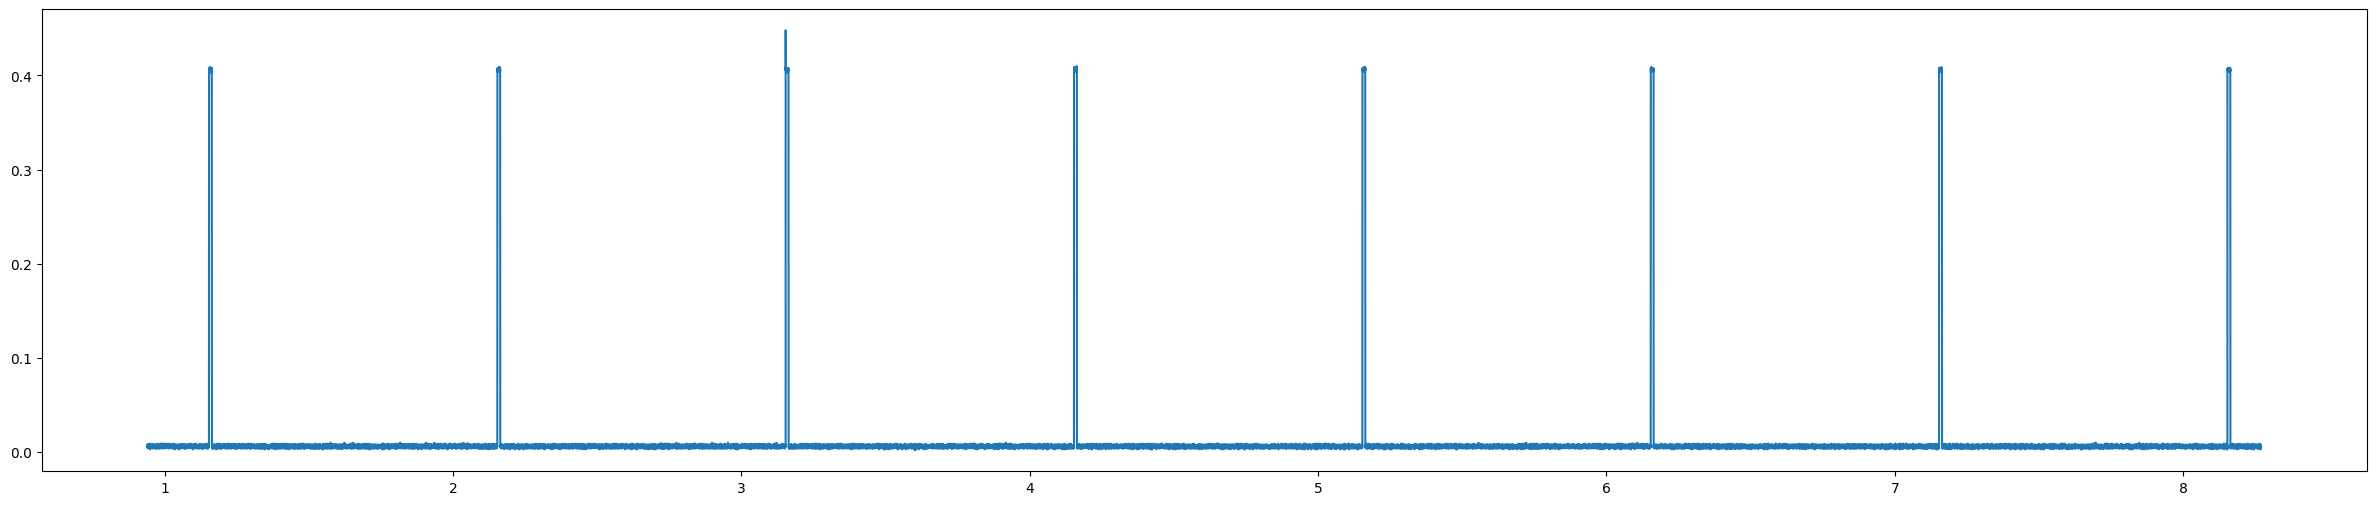

In [5]:
plt.figure(figsize=(30, 6))
plt.plot(time, events)
plt.show()

Visualise if the signals is to your liking

[]


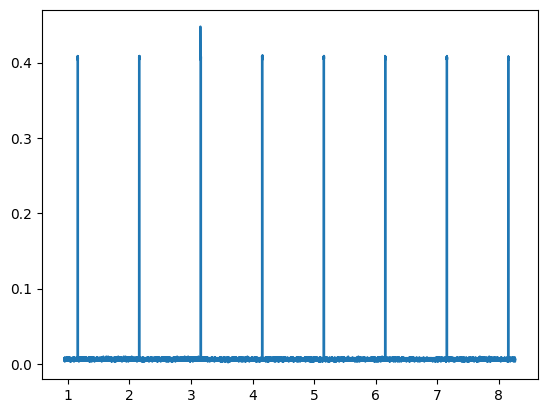

In [6]:
freq = da.find_frequency(time)
index = da.find_event_index(events,freq, select, time_window,experiment)
print(index)
plt.plot(time,events)
plt.scatter(time[index],events[index], color="g")
plt.show()


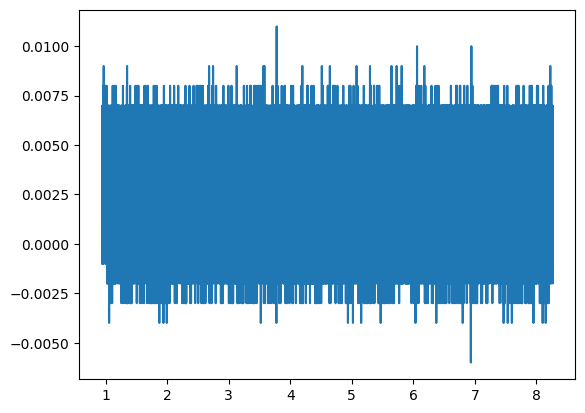

In [9]:
plt.plot(time,y_sig)
# plt.plot(time,events)
# plt.scatter(time[index],events[index], color="g")
plt.show()

Check each single cut independantly

In [7]:
sample = da.cut_individual_event(t_inf, t_supp, index, y_sig, freq)
da.navigate_and_save_subplots(time, index,PATH_saving, "plots", t_inf, t_supp, freq, sample)

TraitError: setting min > max

# PSTH

In [ ]:
da.plot_psth(t_inf,t_supp,*da.PSTH(sample), len(sample))

# Create a CSV file with PSTH data

In [ ]:
data = da.generate_PSTH_data(sample, t_inf, t_supp)
filename = PATH[PATH.rfind("/")+1:-4] + "_PSTH.csv"
da.create_PSTH_CSV(PATH, PATH_saving+ filename, data)